In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Linear Models for Classification

In the previous chapter, we explored a class of regression models having particularly simple analytical and computational properties. We now discuss an analogous class of models for solving classification problems. The goal in classification is to take an input vector $ \mathbf{x} $ and to assign it to one of $ K $ discrete classes $ C_k $ where $ k = 1, \ldots, K $. 

In the most common scenario, the classes are taken to be disjoint, so that each input is assigned to one and only one class. The input space is thereby divided into decision regions whose boundaries are called decision boundaries or decision surfaces.

### Linear Models for Classification

In this chapter, we consider **linear models for classification**, meaning that the decision surfaces are linear functions of the input vector $ \mathbf{x} $ and hence are defined by $ (D - 1) $-dimensional hyperplanes within the $ D $-dimensional input space. Data sets whose classes can be separated exactly by linear decision surfaces are said to be **linearly separable**.

### Target Variable Representation

For regression problems, the target variable $ t $ was simply the vector of real numbers whose values we wish to predict. In the case of classification, there are various ways of using target values to represent class labels:

- **Two-class problems**: Use a binary representation where the target variable $ t \in \{0, 1\} $.  
  - $ t = 1 $ represents class $ C_1 $  
  - $ t = 0 $ represents class $ C_2 $  

We can interpret $ t $ as the probability that the class is $ C_1 $, with probabilities taking only the extreme values of 0 or 1.

- **Multi-class problems**: Use a 1-of-$ K $ coding scheme.  
  If the class is $ C_j $, then all elements $ t_k $ of the target vector $ \mathbf{t} $ are zero except $ t_j $, which takes the value 1.  
  For example, if $ K = 5 $ and the input belongs to class 2, the target vector is:
  $$
  \mathbf{t} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}
  $$
Again, $ t_k $ can be interpreted as the probability of the class $ C_k $.

### Approaches to Classification

In Chapter 1, we identified three distinct approaches to classification:

1. **Discriminant Function**: Directly assigns each vector $ \mathbf{x} $ to a specific class.
2. **Probabilistic Models**: Model the conditional probability distribution $ p(C_k | \mathbf{x}) $ in an inference stage, followed by optimal decision-making.
3. **Generative Approach**: Models the class-conditional densities $ p(\mathbf{x} | C_k) $ and prior probabilities $ p(C_k) $, using Bayes' theorem:
   $$
   p(C_k | \mathbf{x}) = \frac{p(\mathbf{x} | C_k) p(C_k)}{p(\mathbf{x})}
   $$

### Generalized Linear Models

In linear regression models (Chapter 3), the model prediction $ y(\mathbf{x}, \mathbf{w}) $ was given by a linear function of the parameters $ \mathbf{w} $. For classification, we wish to predict discrete class labels or posterior probabilities in the range $ (0, 1) $.

To achieve this, we generalize the model by applying a **nonlinear function** $ f(\cdot) $ to the linear function of $ \mathbf{w} $:
$$
y(\mathbf{x}) = f(\mathbf{w}^T \mathbf{x} + w_0)
$$

- In machine learning, $ f(\cdot) $ is known as an **activation function**.
- In statistics, the inverse of $ f(\cdot) $ is called a **link function**.

The decision surfaces correspond to:
$$
y(\mathbf{x}) = \text{constant} \quad \Rightarrow \quad \mathbf{w}^T \mathbf{x} + w_0 = \text{constant}
$$

Thus, the decision surfaces are linear functions of $ \mathbf{x} $, even if $ f(\cdot) $ is nonlinear. This class of models is known as **generalized linear models**.

(McCullagh and Nelder, 1989). Note, however, that in contrast to the models used for regression, they are no longer linear in the parameters due to the presence of the nonlinear function $ f(\cdot) $. This will lead to more complex analytical and computational properties than for linear regression models. 

Nevertheless, these models are still relatively simple compared to the more general nonlinear models that will be studied in subsequent chapters. The algorithms discussed in this chapter will be equally applicable if we first make a fixed nonlinear transformation of the input variables using a vector of basis functions $ \boldsymbol{\phi}(\mathbf{x}) $, as we did for regression models in previous Chapter 3. 

We begin by considering classification directly in the original input space $ \mathbf{x} $. In Section 4.3, we shall find it convenient to switch to a notation involving basis functions for consistency with later chapters.



In [1]:
import math

def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + math.exp(-z))

def initialize_weights(dim):
    """Initialize weights and bias to zeros."""
    weights = [0] * dim
    bias = 0
    return weights, bias

def dot_product(w, x):
    """Compute the dot product of two vectors."""
    return sum(w_i * x_i for w_i, x_i in zip(w, x))

def predict_proba(weights, bias, X):
    """Predict probabilities for logistic regression."""
    return [sigmoid(dot_product(weights, x) + bias) for x in X]

def predict(weights, bias, X):
    """Predict class labels (0 or 1) based on probabilities."""
    return [1 if prob >= 0.5 else 0 for prob in predict_proba(weights, bias, X)]

def compute_loss(y_true, y_pred):
    """Compute binary cross-entropy loss."""
    loss = 0
    for y, y_hat in zip(y_true, y_pred):
        loss += -y * math.log(y_hat) - (1 - y) * math.log(1 - y_hat)
    return loss / len(y_true)

def update_weights(weights, bias, X, y_true, learning_rate):
    """Perform a single update step for logistic regression using gradient descent."""
    m = len(y_true)
    gradients_w = [0] * len(weights)
    gradient_b = 0

    for x, y in zip(X, y_true):
        y_hat = sigmoid(dot_product(weights, x) + bias)
        error = y_hat - y

        # Update gradients
        for j in range(len(weights)):
            gradients_w[j] += error * x[j]
        gradient_b += error

    # Update weights and bias
    weights = [w - (learning_rate / m) * gw for w, gw in zip(weights, gradients_w)]
    bias -= (learning_rate / m) * gradient_b

    return weights, bias

def train_logistic_regression(X, y, epochs, learning_rate):
    """Train logistic regression model using gradient descent."""
    weights, bias = initialize_weights(len(X[0]))
    for epoch in range(epochs):
        y_pred = predict_proba(weights, bias, X)
        loss = compute_loss(y, y_pred)
        weights, bias = update_weights(weights, bias, X, y, learning_rate)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    return weights, bias

# Example usage
X_train = [[0.5, 1.2], [1.0, 0.8], [1.5, 1.0], [2.0, 1.5]]
y_train = [0, 0, 1, 1]

# Train logistic regression model
weights, bias = train_logistic_regression(X_train, y_train, epochs=100, learning_rate=0.1)

# Make predictions
predictions = predict(weights, bias, X_train)
print(f"Predictions: {predictions}")


Epoch 0, Loss: 0.6931471805599453
Epoch 10, Loss: 0.6505374985144617
Epoch 20, Loss: 0.625222010187953
Epoch 30, Loss: 0.6033665149707285
Epoch 40, Loss: 0.5832011154053814
Epoch 50, Loss: 0.564409294548117
Epoch 60, Loss: 0.5468630730047858
Epoch 70, Loss: 0.530463832178318
Epoch 80, Loss: 0.5151219103881172
Epoch 90, Loss: 0.5007540647649945
Predictions: [0, 1, 1, 1]


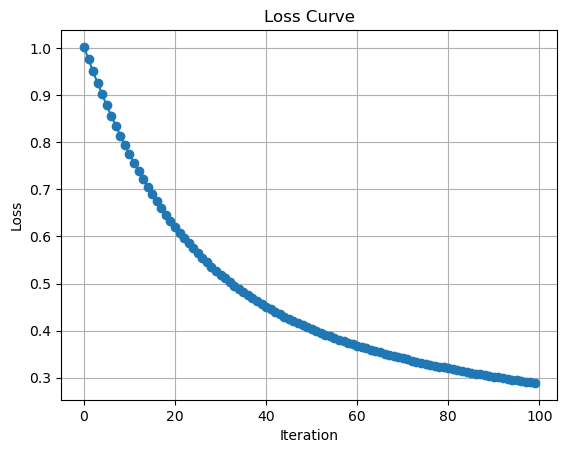

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def predict(weights, bias, X):
    """Predict class probabilities using logistic regression."""
    return sigmoid(np.dot(X, weights) + bias) >= 0.5

def compute_loss(y_true, y_pred):
    """Compute binary cross-entropy loss."""
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def plot_decision_boundary(weights, bias, X, y):
    """Plot decision boundary and data points."""
    X = np.array(X)  # Ensure X is a numpy array
    y = np.array(y)  # Ensure y is a numpy array

    # Define grid limits
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict on grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = predict(weights, bias, grid_points).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=100)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

def plot_loss_curve(losses):
    """Plot the loss curve over iterations."""
    plt.plot(losses, marker='o')
    plt.title("Loss Curve")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

# Generate synthetic data for testing
np.random.seed(0)
X_train = np.random.randn(100, 2)
y_train = (X_train[:, 0] + X_train[:, 1] > 0).astype(int)  # Linearly separable labels

# Initialize weights and bias
weights = np.random.randn(2)
bias = np.random.randn()

# Training loop (simplified)
losses = []
learning_rate = 0.1
num_iterations = 100

for _ in range(num_iterations):
    y_pred = sigmoid(np.dot(X_train, weights) + bias)
    loss = compute_loss(y_train, y_pred)
    losses.append(loss)

    # Gradient descent update
    gradient_weights = np.dot(X_train.T, (y_pred - y_train)) / len(y_train)
    gradient_bias = np.mean(y_pred - y_train)

    weights -= learning_rate * gradient_weights
    bias -= learning_rate * gradient_bias

# Plot the decision boundary and loss curve
plot_decision_boundary(weights, bias, X_train, y_train)
plot_loss_curve(losses)


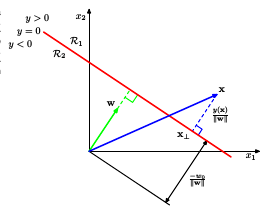

Fig.1 Illustration of the geometry of a linear discriminant function in two dimensions. The decision surface, shown in red, is perpendicular to w, and its displacement from the origin is controlled by the bias parameter $w_0$ . Also, the signed orthogonal distance of a general point x from the decision surface is given by $y(x)/w$.

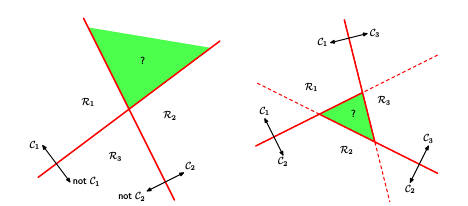

Fig.2 Attempting to construct a K class discriminant from a set of two class discriminants leads to am- biguous regions, shown in green. On the left is an example involving the use of two discriminants designed to distinguish points in class $C_k$ from points not in class $C_k$ . On the right is an example involving three discriminant functions each of which is used to separate a pair of classes $C_k$ and $C_j$ .



##  Discriminant Functions

A **discriminant** is a function that takes an input vector $ \mathbf{x} $ and assigns it to one of $ K $ classes, denoted $ C_k $. In this chapter, we restrict attention to **linear discriminants**, where decision surfaces are hyperplanes. 

We first consider the case of **two classes** and then extend to $ K > 2 $ classes.

##  Two Classes

The simplest representation of a linear discriminant function is given by:

$$
y(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + w_0
$$

where:
- $ \mathbf{w} $ is the weight vector,
- $ w_0 $ is the bias (also called a threshold).

An input vector $ \mathbf{x} $ is assigned to class $ C_1 $ if $ y(\mathbf{x}) \geq 0 $, and to class $ C_2 $ otherwise.  
The decision boundary is defined by:

$$
y(\mathbf{x}) = 0
$$

This corresponds to a $(D - 1)$-dimensional hyperplane in the $ D $-dimensional input space. Consider two points $ \mathbf{x}_A $ and $ \mathbf{x}_B $ on the decision surface. Since $ y(\mathbf{x}_A) = y(\mathbf{x}_B) = 0 $, we have:

$$
\mathbf{w}^T (\mathbf{x}_A - \mathbf{x}_B) = 0
$$

Thus, $ \mathbf{w} $ is orthogonal to every vector in the decision surface, determining its orientation. The **distance** from the origin to the decision surface is:

$$
\frac{w_0}{\|\mathbf{w}\|}
$$

The bias parameter $ w_0 $ determines the location of the decision surface.

The signed orthogonal distance $ r $ of a point $ \mathbf{x} $ from the decision surface is given by:

$$
r = \frac{y(\mathbf{x})}{\|\mathbf{w}\|}
$$

We can rewrite $ y(\mathbf{x}) $ using a dummy input $ x_0 = 1 $ as:

$$
y(\mathbf{x}) = \tilde{\mathbf{w}}^T \tilde{\mathbf{x}}
$$

where:
- $ \tilde{\mathbf{w}} = (w_0, \mathbf{w}) $,
- $ \tilde{\mathbf{x}} = (1, \mathbf{x}) $.

##  Multiple Classes

For $ K > 2 $ classes, we can define a discriminant using $ K $ linear functions:

$$
y_k(\mathbf{x}) = \mathbf{w}_k^T \mathbf{x} + w_{k0}
$$

A point $ \mathbf{x} $ is assigned to class $ C_k $ if:

$$
y_k(\mathbf{x}) > y_j(\mathbf{x}) \quad \text{for all } j \neq k
$$

The decision boundary between classes $ C_k $ and $ C_j $ is given by:

$$
(\mathbf{w}_k - \mathbf{w}_j)^T \mathbf{x} + (w_{k0} - w_{j0}) = 0
$$

This is a $(D - 1)$-dimensional hyperplane. The decision regions are always **singly connected** and **convex**. Given two points $ \mathbf{x}_A $ and $ \mathbf{x}_B $ in the same region $ R_k $, any point $ \hat{\mathbf{x}} $ on the line connecting them:

$$
\hat{\mathbf{x}} = \lambda \mathbf{x}_A + (1 - \lambda) \mathbf{x}_B \quad \text{for } 0 \leq \lambda \leq 1
$$

satisfies:

$$
y_k(\hat{\mathbf{x}}) > y_j(\hat{\mathbf{x}}) \quad \text{for all } j \neq k
$$

Thus, $ \hat{\mathbf{x}} $ lies in $ R_k $, ensuring the region is convex.

## Illustration

The geometry of the decision boundary and signed distance is shown below:

$$
r = \frac{y(\mathbf{x})}{\|\mathbf{w}\|}
$$

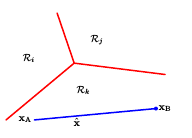

Fig.3 Illustration of the decision regions for a multiclass linear discriminant, with the decision boundaries shown in red. If two points $x_A$ and $x_B$ both lie inside the same decision region $R_k$ , then any point xb that lies on the line connecting these two points must also lie in $R_k$ , and hence the decision region must be singly connected and convex.



### Notes

- For two classes, either a single discriminant or multiple discriminants can be used.
- For multiple classes, using \( K(K-1)/2 \) discriminants leads to ambiguities, resolved by single discriminant formulations.


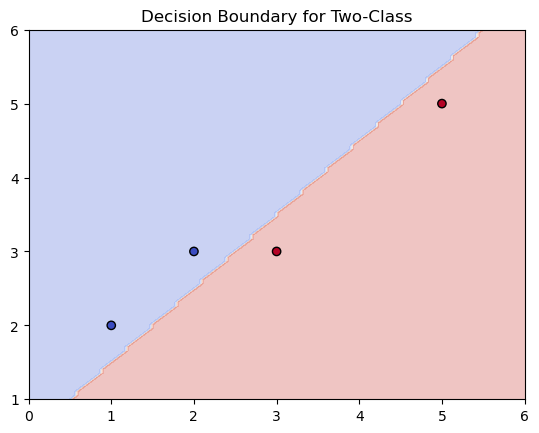

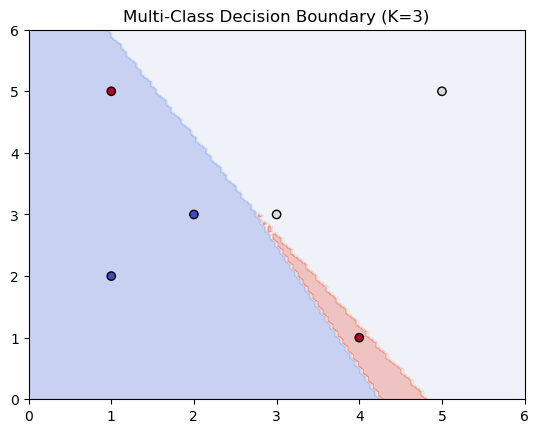

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Discriminant for Two Classes
class LinearDiscriminantTwoClass:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Fit a linear discriminant model for two classes.
        Parameters:
        - X: Feature matrix (n_samples, n_features)
        - y: Labels (n_samples,), where y ∈ {0, 1}
        """
        n_samples, n_features = X.shape
        # Append a bias term (x0 = 1)
        X_bias = np.hstack((np.ones((n_samples, 1)), X))
        y_binary = 2 * y - 1  # Convert y from {0,1} to {-1,1}
        
        # Solve for weights using least squares
        self.weights = np.linalg.pinv(X_bias.T @ X_bias) @ X_bias.T @ y_binary

    def predict(self, X):
        n_samples = X.shape[0]
        X_bias = np.hstack((np.ones((n_samples, 1)), X))
        y_pred = X_bias @ self.weights
        return (y_pred >= 0).astype(int)

    def plot_decision_boundary(self, X, y):
        """
        Plot the decision boundary for two-class.
        """
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(grid).reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
        plt.title('Decision Boundary for Two-Class')
        plt.show()

# Linear Discriminant for Multiple Classes
class LinearDiscriminantMultiClass:
    def __init__(self):
        self.weights = None

    def fit(self, X, y, num_classes):
        """
        Fit a linear discriminant model for multiple classes.
        Parameters:
        - X: Feature matrix (n_samples, n_features)
        - y: Labels (n_samples,)
        - num_classes: Total number of classes K
        """
        n_samples, n_features = X.shape
        X_bias = np.hstack((np.ones((n_samples, 1)), X))
        
        # One-vs-All: Fit a linear model for each class
        self.weights = np.zeros((num_classes, n_features + 1))
        for k in range(num_classes):
            y_binary = np.where(y == k, 1, -1)
            self.weights[k] = np.linalg.pinv(X_bias.T @ X_bias) @ X_bias.T @ y_binary

    def predict(self, X):
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        scores = X_bias @ self.weights.T
        return np.argmax(scores, axis=1)

    def plot_decision_boundary(self, X, y, num_classes):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(grid).reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
        plt.title(f'Multi-Class Decision Boundary (K={num_classes})')
        plt.show()

# Example usage for Two-Class Linear Discriminant
X_train_2class = np.array([[1, 2], [2, 3], [3, 3], [5, 5]])
y_train_2class = np.array([0, 0, 1, 1])

model_2class = LinearDiscriminantTwoClass()
model_2class.fit(X_train_2class, y_train_2class)
model_2class.plot_decision_boundary(X_train_2class, y_train_2class)

# Example usage for Multi-Class Linear Discriminant
X_train_multi = np.array([[1, 2], [2, 3], [3, 3], [5, 5], [1, 5], [4, 1]])
y_train_multi = np.array([0, 0, 1, 1, 2, 2])

model_multi = LinearDiscriminantMultiClass()
model_multi.fit(X_train_multi, y_train_multi, num_classes=3)
model_multi.plot_decision_boundary(X_train_multi, y_train_multi, num_classes=3)


##  Least Squares for Classification

In lst chapter, we considered models that were linear functions of the parameters, and we saw that the minimization of a sum-of-squares error function led to a simple closed-form solution for the parameter values. It is therefore tempting to see if we can apply the same formalism to classification problems. Consider a general classification problem with $ K $ classes, with a 1-of-$ K $ binary coding scheme for the target vector $ t $. One justification for using least squares in such a context is that it approximates the conditional expectation $ E[t|x] $ of the target values given the input vector. For the binary coding scheme, this conditional expectation is given by the vector of posterior class probabilities. Unfortunately, however, these probabilities are typically approximated poorly, as the approximations can have values outside the range $ (0, 1) $, due to the limited flexibility of a linear model as we shall see shortly.

Each class $ C_k $ is described by its own linear model, such that

$$
y_k(x) = w_k^T x + w_k^0 \quad \text{where} \quad k = 1, \dots, K.
$$

We can conveniently group these together using vector notation:

$$
y(x) = W^T x^*,
$$

where $ W $ is a matrix whose $ k $-th column comprises the $ D+1 $-dimensional vector

$$
w_k^T = (w_k^0, w_k^T)^T
$$

and $ x^* = (1, x^T)^T $ is the corresponding augmented input vector, with a dummy input $ x_0 = 1 $.

A new input $ x $ is then assigned to the class for which the output $ y_k(x) = w_k^T x^* $ is largest.

We now determine the parameter matrix $ W $ by minimizing a sum-of-squares error function, as we did for regression in Chapter 3. Consider a training dataset $ \{ x_n, t_n \} $ where $ n = 1, \dots, N $, and define a matrix $ T $ whose $ n $-th row is the vector $ t_n^T $, together with a matrix $ X $ whose $ n $-th row is $ x_n^T $. The sum-of-squares error function $ E $ can then be written as:

$$
E = \frac{1}{2} \text{Tr} \left( (XW^T - T)^T (XW^T - T) \right).
$$

Setting the derivative with respect to $ W $ to zero and rearranging, we obtain the solution for $ W $ in the form:

$$
W = (X^T X)^{-1} X^T T.
$$

This gives the discriminant function in the form:

$$
y(x) = W^T x^* = T^T (X^T X)^{-1} X^T x^*.
$$

An interesting property of least-squares solutions with multiple target variables is that if every target vector in the training set satisfies some linear constraint:

$$
a^T t_n + b = 0 \quad \text{for some constants} \quad a \text{ and } b,
$$

then the model prediction for any value of $ x $ will satisfy the same constraint:

$$
a^T y(x) + b = 0.
$$

Thus, if we use a 1-of-$ K $ coding scheme for $ K $ classes, the predictions made by the model will have the property that the elements of $ y(x) $ will sum to 1 for any value of $ x $.

However, this summation constraint alone is not sufficient to allow the model outputs to be interpreted as probabilities because they are not constrained to lie within the interval $ (0, 1) $. 

The least-squares approach gives an exact closed-form solution for the discriminant function parameters. However, even as a discriminant function (where we use it to make decisions directly and dispense with any probabilistic interpretation), it suffers from some severe problems. We have already seen that least-squares solutions lack robustness to outliers, and this applies equally to the classification application, as illustrated in Figure 4.4.

## Problems with Least Squares

The left plot shows data from two classes, denoted by red crosses and blue circles, together with the decision boundary found by least squares (magenta curve) and also by the logistic regression model (green curve). The right-hand plot shows the corresponding results obtained when extra data points are added at the bottom left of the diagram, showing that least squares is highly sensitive to outliers, unlike logistic regression.

$$
\text{Figure 4.4: The impact of outliers on least squares classification.}
$$

This highlights a critical issue: The sum-of-squares error function penalizes predictions that are "too correct" in that they lie a long way on the correct side of the decision boundary.

## Example of Class Separation Failure

The failure of least squares becomes even more evident when dealing with multi-class classification problems where linear decision boundaries can give excellent separation between the classes. As shown in Figure 4.5, least squares gives poor results when handling multi-class data, with only a small region of the input space assigned to one of the classes.

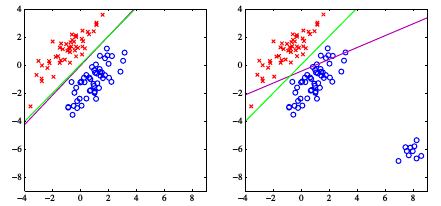

Fig.4 The left plot shows data from two classes, denoted by red crosses and blue circles, together with the decision boundary found by least squares (magenta curve) and also by the logistic regression model (green curve), which is discussed later in Section 4.3.2. The right-hand plot shows the corresponding results obtained when extra data points are added at the bottom left of the diagram, showing that least squares is highly sensitive to outliers, unlike logistic regression.

In contrast, models such as logistic regression give satisfactory results in such cases. This failure of least squares should not surprise us, as it corresponds to maximum likelihood under the assumption of a Gaussian conditional distribution, while binary target vectors clearly have a distribution far from Gaussian.

### Conclusion

By adopting more appropriate probabilistic models, we can obtain classification techniques with much better properties than least squares. In the next sections, we will explore alternative nonprobabilistic methods for setting the parameters in linear classification models, such as Fisher’s Linear Discriminant and the Perceptron algorithm.


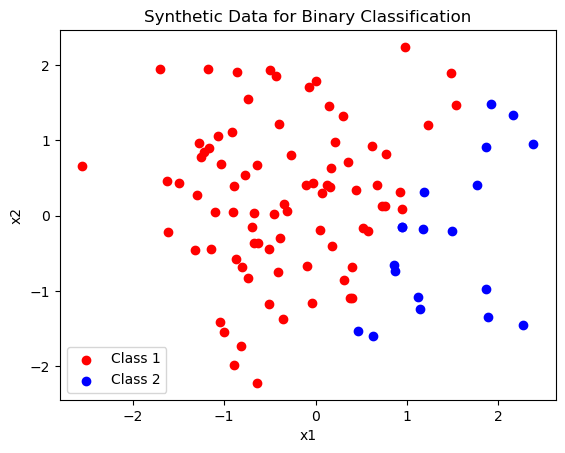

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for binary classification (2 classes)
np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 2)

# Create binary labels based on a linear boundary (y = w0 + w1*x1 + w2*x2)
# Class 1 (label=1) for points above the line, class 2 (label=0) below the line
w_true = np.array([1, -1, 0.5])  # True weights (w0, w1, w2)
X_aug = np.hstack([np.ones((n_samples, 1)), X])  # Augment X with ones for bias term (w0)
y_true = (X_aug @ w_true.T > 0).astype(int)

# Split the data into two classes
X_class1 = X[y_true == 1]
X_class2 = X[y_true == 0]

# Plot the synthetic data points
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='red', label='Class 1')
plt.scatter(X_class2[:, 0], X_class2[:, 1], color='blue', label='Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Synthetic Data for Binary Classification')
plt.show()

# Least Squares Classifier implementation
# Step 1: Add bias term (x0 = 1) to the input data matrix
X_aug = np.hstack([np.ones((n_samples, 1)), X])

# Step 2: Target matrix t (1-of-K encoding for binary case)
T = np.zeros((n_samples, 2))
T[np.arange(n_samples), y_true] = 1

# Step 3: Compute the parameter matrix W using the closed-form solution
W = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ T

# Step 4: Make predictions
y_pred = X_aug @ W.argmax(axis=1)

# Step 5: Visualize decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.c_[xx.ravel(), yy.ravel()]
Z_aug = np.hstack([np.ones((Z.shape[0], 1)), Z])  # Augment for bias term
Z_pred = Z_aug @ W.argmax(axis=1)

plt.scatter(X_class1[:, 0], X_class1[:, 1], color='red', label='Class 1')
plt.scatter(X_class2[:, 0], X_class2[:, 1], color='blue', label='Class 2')
plt.contourf(xx, yy, Z_pred.reshape(xx.shape), alpha=0.3, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Decision Boundary with Least Squares Classifier')
plt.show()



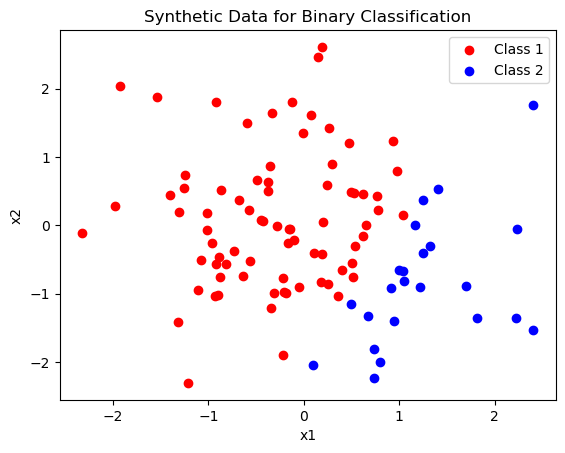

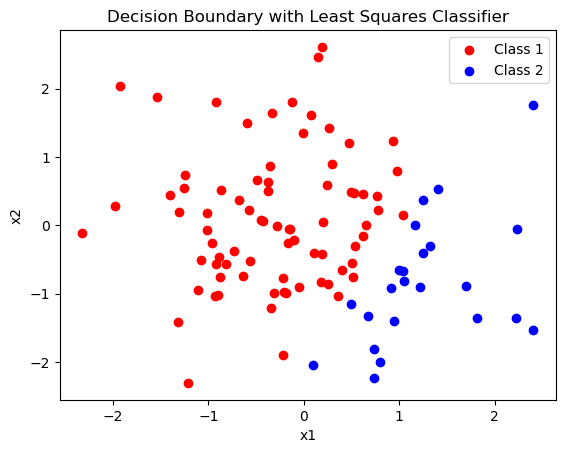

In [10]:
import random
import matplotlib.pyplot as plt

# Helper functions to handle matrix operations manually
def dot_product(v1, v2):
    return sum(a * b for a, b in zip(v1, v2))

def matrix_multiply(A, B):
    # Multiply matrix A and B
    return [[dot_product(A_row, B_col) for B_col in zip(*B)] for A_row in A]

def transpose_matrix(M):
    # Transpose matrix M
    return list(map(list, zip(*M)))

def inverse_matrix(M):
    # A simple 2x2 matrix inverse
    det = M[0][0] * M[1][1] - M[0][1] * M[1][0]
    if det == 0:
        raise ValueError("Matrix is not invertible")
    return [[M[1][1] / det, -M[0][1] / det], [-M[1][0] / det, M[0][0] / det]]

def add_bias(X):
    # Add bias term to the data (1's column)
    return [[1] + row for row in X]

# Generate synthetic data for binary classification (2 classes)
random.seed(0)
n_samples = 100
X = [[random.gauss(0, 1), random.gauss(0, 1)] for _ in range(n_samples)]

# Create binary labels based on a linear boundary (y = w0 + w1*x1 + w2*x2)
# Class 1 (label=1) for points above the line, class 2 (label=0) below the line
w_true = [1, -1, 0.5]  # True weights (w0, w1, w2)
X_aug = add_bias(X)  # Add bias term (x0 = 1)
y_true = [1 if dot_product(w_true, x) > 0 else 0 for x in X_aug]

# Split the data into two classes
X_class1 = [X[i] for i in range(n_samples) if y_true[i] == 1]
X_class2 = [X[i] for i in range(n_samples) if y_true[i] == 0]

# Plot the synthetic data points
plt.scatter([x[0] for x in X_class1], [x[1] for x in X_class1], color='red', label='Class 1')
plt.scatter([x[0] for x in X_class2], [x[1] for x in X_class2], color='blue', label='Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Synthetic Data for Binary Classification')
plt.show()

# Least Squares Classifier implementation

# Step 1: Add bias term (x0 = 1) to the input data matrix
X_aug = add_bias(X)

# Step 2: Target matrix t (1-of-K encoding for binary case)
T = [[1, 0] if label == 0 else [0, 1] for label in y_true]  # 1-of-K encoding for binary

# Step 3: Compute the parameter matrix W using the closed-form solution
# W = (X^T * X)^(-1) * X^T * T
XT = transpose_matrix(X_aug)
XTX = matrix_multiply(XT, X_aug)

# Inverse of XTX for 2x2 case
XTX_inv = inverse_matrix(XTX)

# Multiply XTX_inv with XT to get W
XTX_inv_XT = matrix_multiply(XTX_inv, XT)
W = matrix_multiply(XTX_inv_XT, T)

# Step 4: Make predictions
def predict(x):
    output = [dot_product(w, x) for w in W]
    return output.index(max(output))  # Return the class with the highest output

y_pred = [predict(x) for x in X_aug]

# Step 5: Visualize decision boundary
x_min, x_max = min([x[0] for x in X]), max([x[0] for x in X])
y_min, y_max = min([x[1] for x in X]), max([x[1] for x in X])
xx, yy = [[x] * len(range(int(y_min), int(y_max))) for x in range(int(x_min), int(x_max))], \
          [[y for _ in range(int(x_min), int(x_max))] for y in range(int(y_min), int(y_max))]

# For plotting the decision boundary, calculate for each point if it is class 1 or 2
Z = [[predict([xx_val, yy_val]) for xx_val, yy_val in zip(x_row, y_row)] for x_row, y_row in zip(xx, yy)]

# Plot decision boundary
plt.scatter([x[0] for x in X_class1], [x[1] for x in X_class1], color='red', label='Class 1')
plt.scatter([x[0] for x in X_class2], [x[1] for x in X_class2], color='blue', label='Class 2')
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Decision Boundary with Least Squares Classifier')
plt.show()


## Fisher’s Linear Discriminant

One way to view a linear classification model is in terms of dimensionality reduction. Consider first the case of two classes, and suppose we take the $ D $-dimensional input vector $ \mathbf{x} $ and project it down to one dimension using

$$
y = \mathbf{w}^T \mathbf{x}
$$

If we place a threshold on $ y $ and classify $ y \geq -w_0 $ as class $ C_1 $, and otherwise class $ C_2 $, then we obtain our standard linear classifier discussed in the previous section. In general, the projection onto one dimension leads to a considerable loss of information, and classes that are well separated in the original $ D $-dimensional space may become strongly overlapping in one dimension.

However, by adjusting the components of the weight vector $ \mathbf{w} $, we can select a projection that maximizes the class separation. To begin with, consider a two-class problem in which there are $ N_1 $ points of class $ C_1 $ and $ N_2 $ points of class $ C_2 $, so that the mean vectors of the two classes are given by

$$
\mathbf{m_1} = \frac{1}{N_1} \sum_{n \in C_1} \mathbf{x_n}, \quad \mathbf{m_2} = \frac{1}{N_2} \sum_{n \in C_2} \mathbf{x_n}
$$

The simplest measure of the separation of the classes, when projected onto $ \mathbf{w} $, is the separation of the projected class means. This suggests that we might choose $ \mathbf{w} $ so as to maximize

$$
m_2 - m_1 = \mathbf{w}^T (\mathbf{m_2} - \mathbf{m_1})
$$

where

$$
m_k = \mathbf{w}^T \mathbf{m_k} \quad \text{for} \quad k = 1, 2
$$

However, this expression can be made arbitrarily large simply by increasing the magnitude of $ \mathbf{w} $. To solve this problem, we could constrain $ \mathbf{w} $ to have unit length, so that

$$
\mathbf{w}^T \mathbf{w} = 1
$$

Using a Lagrange multiplier to perform the constrained maximization, we find that

$$
\mathbf{w} \propto (\mathbf{m_2} - \mathbf{m_1})
$$

There is still a problem with this approach, however, as illustrated in Fig.6. This shows two classes that are well separated in the original two-dimensional space $ (x_1, x_2) $ but that have considerable overlap when projected onto the line joining their means. This difficulty arises from the strongly nondiagonal covariances of the class distributions.

The idea proposed by Fisher is to maximize a function that will give a large separation between the projected class means while also giving a small variance within each class, thereby minimizing the class overlap. The projection formula

$$
y = \mathbf{w}^T \mathbf{x}
$$

transforms the set of labelled data points in $ \mathbf{x} $ into a labelled set in the one-dimensional space $ y $. The within-class variance of the transformed data from class $ C_k $ is therefore given by

$$
s_k^2 = \sum_{n \in C_k} (y_n - m_k)^2
$$

where

$$
y_n = \mathbf{w}^T \mathbf{x_n}
$$

We can define the total within-class variance for the whole dataset to be simply $ s_1^2 + s_2^2 $. The Fisher criterion is defined to be the ratio of the between-class variance to the within-class variance and is given by

$$
J(\mathbf{w}) = \frac{(\mathbf{m_2} - \mathbf{m_1})^2}{s_1^2 + s_2^2}
$$

We can make the dependence on \( \mathbf{w} \) explicit by using the projection formula, class means, and within-class variances to rewrite the Fisher criterion in the form

$$
J(\mathbf{w}) = \frac{\mathbf{w}^T \mathbf{S_B} \mathbf{w}}{\mathbf{w}^T \mathbf{S_W} \mathbf{w}}
$$

where $ \mathbf{S_B} $ is the between-class covariance matrix, and $ \mathbf{S_W} $ is the total within-class covariance matrix, given by

$$
\mathbf{S_B} = (\mathbf{m_2} - \mathbf{m_1})(\mathbf{m_2} - \mathbf{m_1})^T
$$

and

$$
\mathbf{S_W} = \sum_{n \in C_1} (\mathbf{x_n} - \mathbf{m_1})(\mathbf{x_n} - \mathbf{m_1})^T + \sum_{n \in C_2} (\mathbf{x_n} - \mathbf{m_2})(\mathbf{x_n} - \mathbf{m_2})^T
$$

Differentiating $ J(\mathbf{w}) $ with respect to $ \mathbf{w} $, we find that $ J(\mathbf{w}) $ is maximized when

$$
\mathbf{S_W}^{-1} \mathbf{S_B} \mathbf{w} = \lambda \mathbf{S_W}^{-1} \mathbf{S_B} \mathbf{w}
$$

From this equation, we see that $ \mathbf{S_B} \mathbf{w} $ is always in the direction of $ \mathbf{m_2} - \mathbf{m_1} $. Furthermore, we do not care about the magnitude of $ \mathbf{w} $, only its direction, and so we can drop the scalar factors $ \mathbf{w}^T \mathbf{S_B} \mathbf{w} $ and $ \mathbf{w}^T \mathbf{S_W} \mathbf{w} $. Multiplying both sides by $ \mathbf{S_W}^{-1} $, we then obtain

$$
\mathbf{w} \propto \mathbf{S_W}^{-1} (\mathbf{m_2} - \mathbf{m_1})
$$

Note that if the within-class covariance is isotropic, so that $ \mathbf{S_W} $ is proportional to the unit matrix, we find that $ \mathbf{w} $ is proportional to the difference of the class means, as discussed above.

The result

$$
\mathbf{w} \propto \mathbf{S_W}^{-1} (\mathbf{m_2} - \mathbf{m_1})
$$

is known as **Fisher’s Linear Discriminant**, although strictly it is not a discriminant but rather a specific choice of direction for projection of the data down to one dimension. However, the projected data can subsequently be used to construct a discriminant, by choosing a threshold $ y_0 $ so that we classify a new point as belonging to $ C_1 $ if $ y(x) \geq y_0 $ and classify it as belonging to $ C_2 $ otherwise.

For example, we can model the class-conditional densities $ p(y|C_k) $ using Gaussian distributions and then use maximum likelihood to find the parameters of the Gaussian distributions. The formalism from Section 1.5.1 then gives an expression for the optimal threshold. Some justification for the Gaussian assumption comes from the central limit theorem, noting that $ y = \mathbf{w}^T \mathbf{x} $ is the sum of a set of random variables.


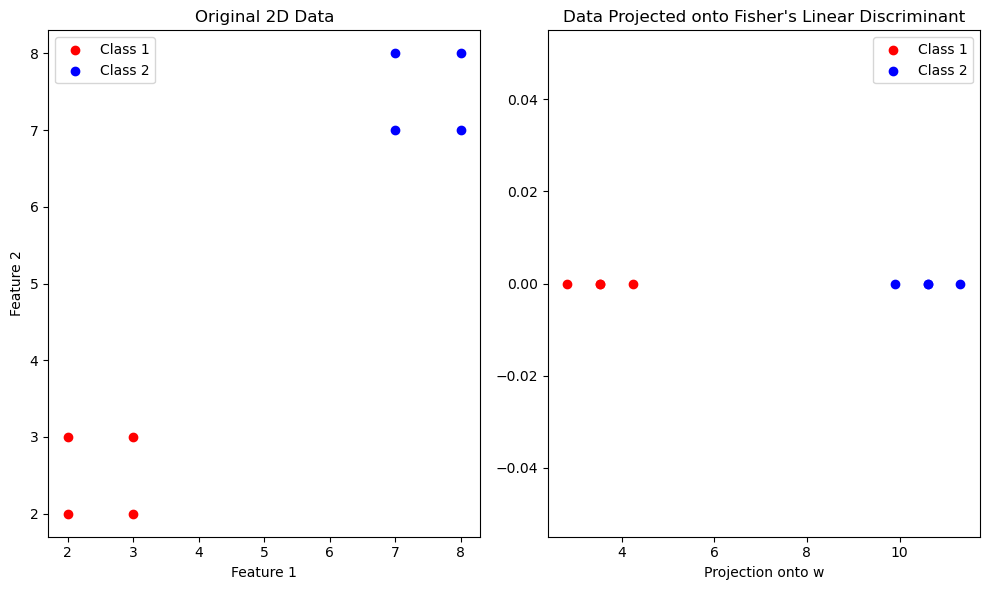

In [11]:
import matplotlib.pyplot as plt

# Function to compute the mean of the data points
def compute_mean(X):
    return sum(X) / len(X)

# Function to compute the within-class scatter matrix
def compute_within_class_scatter(X, mean_class, overall_mean):
    scatter_matrix = 0
    for x in X:
        x_centered = x - mean_class
        scatter_matrix += x_centered[:, None] @ x_centered[None, :]
    return scatter_matrix

# Function to compute the between-class scatter matrix
def compute_between_class_scatter(mean_class1, mean_class2, overall_mean, n_class1, n_class2):
    mean_diff = mean_class2 - mean_class1
    scatter_matrix = n_class1 * (mean_diff[:, None] @ mean_diff[None, :])
    return scatter_matrix

# Fisher's Linear Discriminant implementation
def fisher_linear_discriminant(X1, X2):
    # Compute class means
    mean_class1 = compute_mean(X1)
    mean_class2 = compute_mean(X2)
    
    # Compute overall mean
    overall_mean = (sum(X1) + sum(X2)) / (len(X1) + len(X2))
    
    # Compute within-class scatter matrices
    SW1 = compute_within_class_scatter(X1, mean_class1, overall_mean)
    SW2 = compute_within_class_scatter(X2, mean_class2, overall_mean)
    
    SW = SW1 + SW2  # Total within-class scatter matrix
    
    # Compute between-class scatter matrix
    SB = compute_between_class_scatter(mean_class1, mean_class2, overall_mean, len(X1), len(X2))
    
    # Solve the eigenvalue problem for the Fisher criterion
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(SW) @ SB)
    
    # The Fisher's linear discriminant is the eigenvector corresponding to the largest eigenvalue
    w = eigenvectors[:, np.argmax(eigenvalues)]
    
    return w

# Example: 2D synthetic dataset
X1 = np.array([[2, 3], [3, 3], [2, 2], [3, 2]])  # Class 1 (Red)
X2 = np.array([[7, 8], [8, 7], [7, 7], [8, 8]])  # Class 2 (Blue)

# Compute the Fisher's linear discriminant
w = fisher_linear_discriminant(X1, X2)

# Project the data onto the Fisher's linear discriminant
X1_projected = X1 @ w
X2_projected = X2 @ w

# Plot the original data and projected data
plt.figure(figsize=(10, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], color='r', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='b', label='Class 2')
plt.title('Original 2D Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot the projected data
plt.subplot(1, 2, 2)
plt.scatter(X1_projected, np.zeros_like(X1_projected), color='r', label='Class 1')
plt.scatter(X2_projected, np.zeros_like(X2_projected), color='b', label='Class 2')
plt.title('Data Projected onto Fisher\'s Linear Discriminant')
plt.xlabel('Projection onto w')
plt.legend()

plt.tight_layout()
plt.show()
